## Problem 5
### Given the stock return data in DailyReturns.csv.
1. Create a routine for calculating an exponentially weighted covariance matrix. If you have
a package that calculates it for you, verify it produces the expected results from the
testdata folder.
2. Vary λ. Use PCA and plot the cumulative variance explained of λ in (0,1) by each
eigenvalue for each λ chosen.
3. What does this tell us about the values of λ and the effect it has on the covariance
matrix?

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('DailyReturn.csv')
data_1 = data.drop(data.columns[0], axis=1)
#define lambda here
lambda_1= 0.97

# weight_list


def weight_t_i(i):
    global lambda_1
    return (1-lambda_1)*lambda_1**(i)

def weight_list(len):
    weights =[]
    for i in range(1, len+1):
        weights.append(weight_t_i(len-i))
    weights=np.array(weights)
    weights=weights/np.sum(weights)
    return weights

weights=weight_list(len(data_1))


def ewcov(data1, data2):
    global weigthts
    data1 = data1.dropna()
    data2 = data2.dropna()
    data1 = data1.reset_index(drop=True)
    data2 = data2.reset_index(drop=True)
    data1 = data1.to_numpy()
    data2 = data2.to_numpy()
    data1 = data1.flatten()
    data2 = data2.flatten()
    len_data1 = len(data1)
    len_data2 = len(data2)
    if len_data1 != len_data2:
        print('data1 and data2 have different length')
        return

    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    return (data1-mean1) @ np.diag(weights) @ (data2-mean2)





In [ ]:
def out_ewm(data):
    init_cov=data.cov()
    for i in init_cov.columns:
        for j in init_cov.columns:
            init_cov.loc[j,i] = ewcov(data[i], data[j])
    return init_cov

print(out_ewm(data_1))

           SPY      AAPL      NVDA      MSFT      AMZN      META     GOOGL  \
SPY   0.000072  0.000054  0.000126  0.000081  0.000112  0.000082  0.000087   
AAPL  0.000054  0.000140  0.000042  0.000085  0.000080  0.000058  0.000070   
NVDA  0.000126  0.000042  0.000670  0.000137  0.000195  0.000192  0.000143   
MSFT  0.000081  0.000085  0.000137  0.000163  0.000173  0.000129  0.000121   
AMZN  0.000112  0.000080  0.000195  0.000173  0.000323  0.000187  0.000201   
...        ...       ...       ...       ...       ...       ...       ...   
KKR   0.000135  0.000042  0.000223  0.000107  0.000188  0.000121  0.000160   
MU    0.000150  0.000057  0.000314  0.000157  0.000171  0.000172  0.000164   
PLD   0.000060  0.000061  0.000019  0.000064  0.000056  0.000018  0.000024   
LRCX  0.000128  0.000085  0.000326  0.000155  0.000185  0.000232  0.000157   
EQIX  0.000052  0.000038  0.000048  0.000053  0.000071  0.000073  0.000052   

          AVGO      TSLA      GOOG  ...      SBUX       MMC    

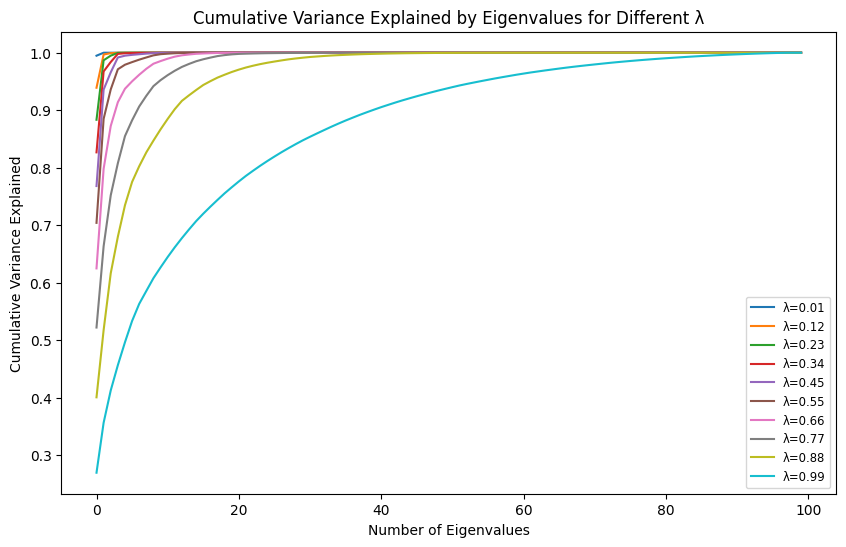

In [47]:
## 2. Vary λ. Use PCA and plot the cumulative variance explained of λ in (0,1) by each eigenvalue for each λ chosen.
## formula: for a list of sequenced positive eigenvalues, the cumulative variance explained by the first i eigenvalues is
## sum of the first i eigenvalues divided by the sum of all eigenvalues.

lambda_list = np.linspace(0.01, 0.99, 10)
cumulative_variance = []
for lambda_1 in lambda_list:
    weights = weight_list(len(data_1))
    cov_matrix = out_ewm(data_1)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalues[eigenvalues<0]=0
    eigenvalues = np.sort(eigenvalues)[::-1]
    cumulative_variance.append(np.cumsum(eigenvalues)/np.sum(eigenvalues))

## plat the cumulative variance 

plt.figure(figsize=(10, 6))
for i, lambda_1 in enumerate(lambda_list):
    plt.plot(cumulative_variance[i], label=f'λ={lambda_1:.2f}')
plt.xlabel('Number of Eigenvalues')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Eigenvalues for Different λ')
plt.legend(loc='best', fontsize='small')
plt.show()

We have plotted the cumulative variance explained charts for different values of λ. From these plots, we can make the following observations:

    For larger λ values:
    The cumulative variance explained curve is relatively flat, which indicates that historical data has a significant influence on the calculation of the covariance matrix. As a result, the eigenvalue distribution may be more uniform.

    For smaller λ values:
    The cumulative variance explained curve is relatively steep, implying that recent data has a greater impact on the calculation of the covariance matrix. Consequently, the eigenvalue distribution may be more concentrated.